## ReCell Used Device Full Code Project
### Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 

### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 

### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

#### Data Dictionary

* brand_name: Name of manufacturing brand
* os: OS on which the device runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the device battery in mAh
* weight: Weight of the device in grams
* release_year: Year when the device model was released
* days_used: Number of days the used/refurbished device has been used
* normalized_new_price: Normalized price of a new device of the same model in euros
* normalized_used_price: Normalized price of the used/refurbished device in euros


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('used_device_data.csv')
df.shape

(3454, 15)

#### The dataframe has 3454 rows and 15 columns

In [3]:
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


In [4]:
data = df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Brand name, OS, 4g and 5g are all object type columns
* All other columns are numerical type

In [6]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*  6 columns have missing data; main_camera_mp, selfie_camera_mp, int_memory ram, battery, weight.

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observations:
* There are 34 different brand names and 4 different OS in the data
* The screen size ranges from 5.08 cm to 30.71 cm
* The normalized used price ranges from 1.5 to 6.6 Euros while the normalized new prices ranges from 2.9 to 7.8 Euros
* The min RAM is 0.02GB and the max is 12GB
* The devices in the dataset released between the years of 2013 and 2020

## Univariate Data Analysis

In [8]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height() 
        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()  

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, 
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  

### normalized_used_price

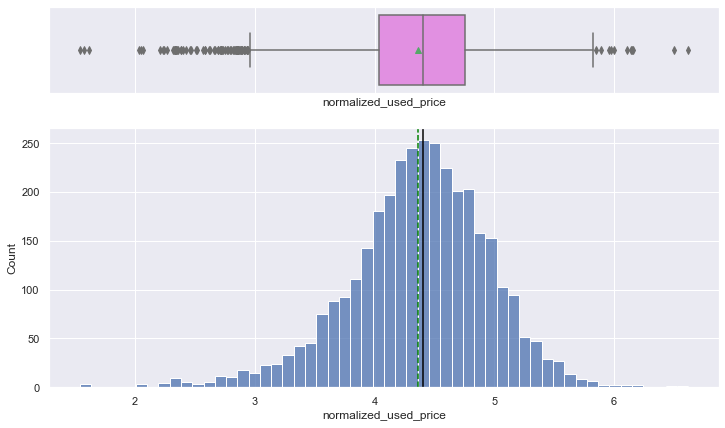

In [10]:
histogram_boxplot(data, "normalized_used_price")

* Observation: normalized_used_price follows a near normal distribution with mean almost same as median. Mean value at 4.36 and median 4.41

### normalized_new_price

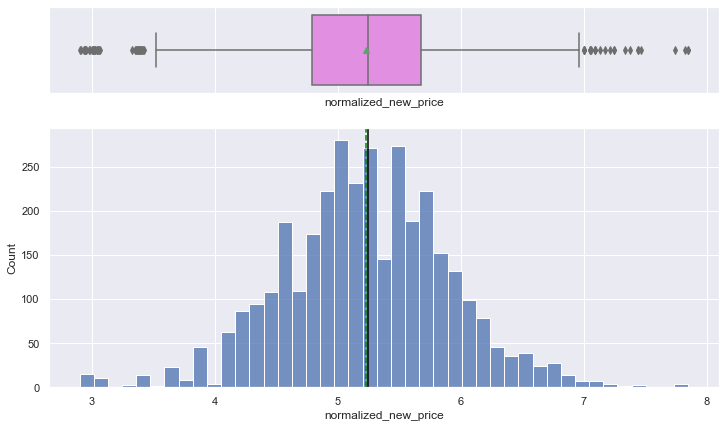

In [11]:
histogram_boxplot(data, "normalized_new_price")

* Observation: normalized_new_price also follows a near normal distribution with mean about the same as median. Mean value at ~ 5.23 and median ~ 5.25

### screen_size

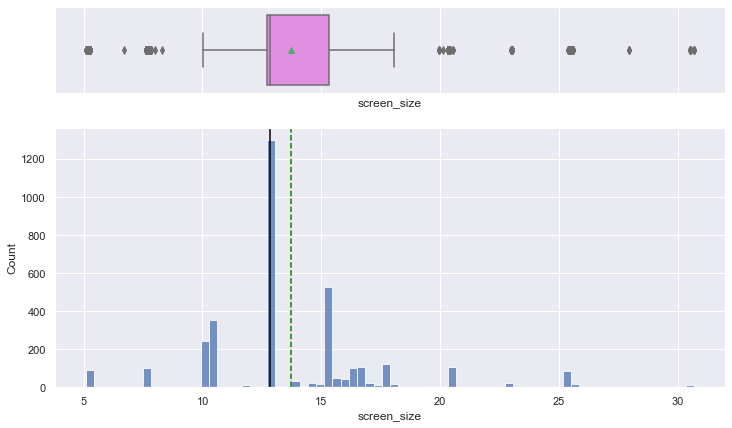

In [12]:
histogram_boxplot(data, "screen_size")

### main_camera_mp

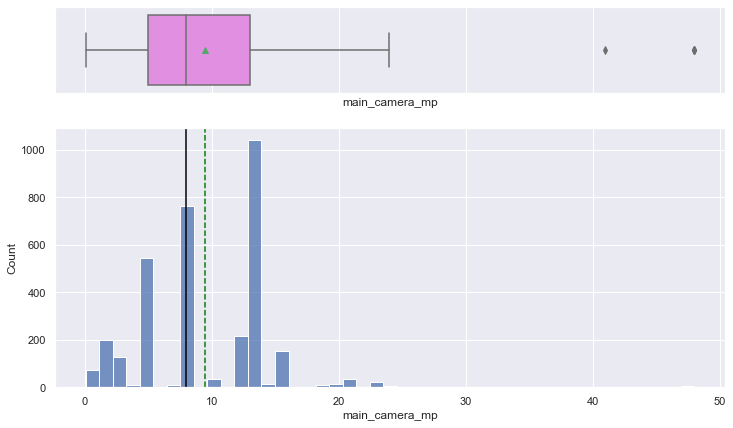

In [13]:
histogram_boxplot(data, "main_camera_mp")

### selfie_camera_mp

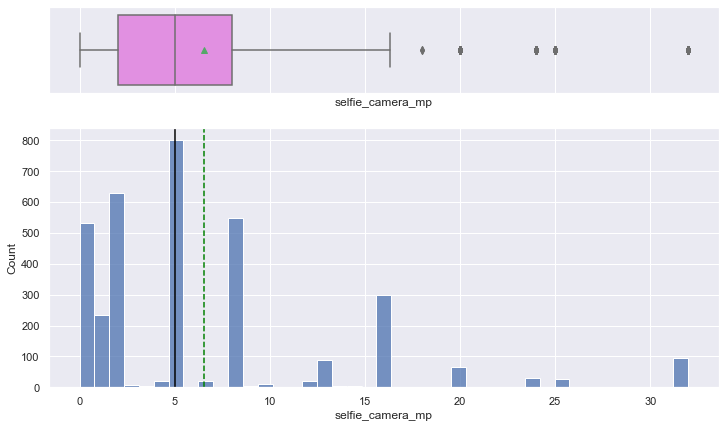

In [14]:
histogram_boxplot(data, "selfie_camera_mp")

Observations: 
* For above 3 plots, screen_size, main_camera_mp and selfie_camera_mp seem to follow similar distributions, with their means slightly higher than their medians. This shows a slightly right skewed distribution, meaning quite a number of devices have high specs; screen_size, main_camera_mp and selfie_camera_mp. 
* screen_size has outliers on both extremes of the boxplots, signifying a wide range of screen sizes to fit most customer needs. 
* Both main and selfie camera mp on the other hand only have outliers to the right, reaffirming a high customer desire for higher spec devices

### int_memory

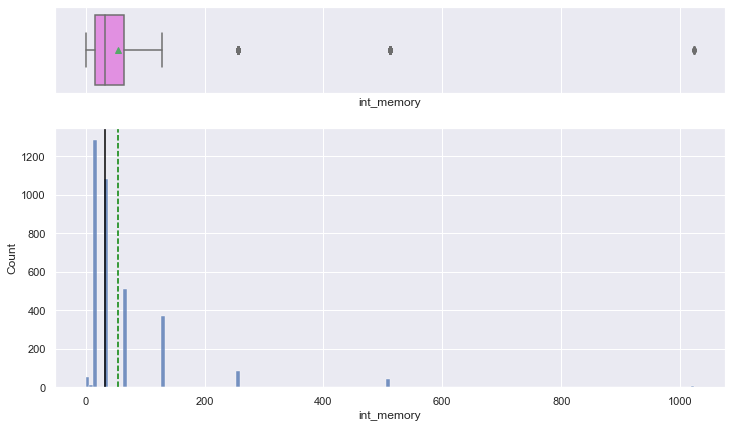

In [15]:
histogram_boxplot(data, 'int_memory')

* Observation: Distribution above slightly skewed right, showing more devices with higher int_memory

### ram

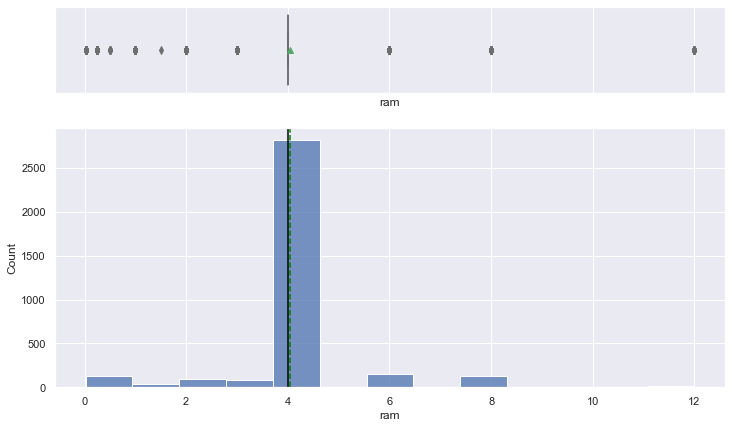

In [16]:
histogram_boxplot(data, 'ram')

* Observation: Most devices have a RAM of 4GB and seems to be most desired by users. Just a few devices with lower or higher RAM

### weight

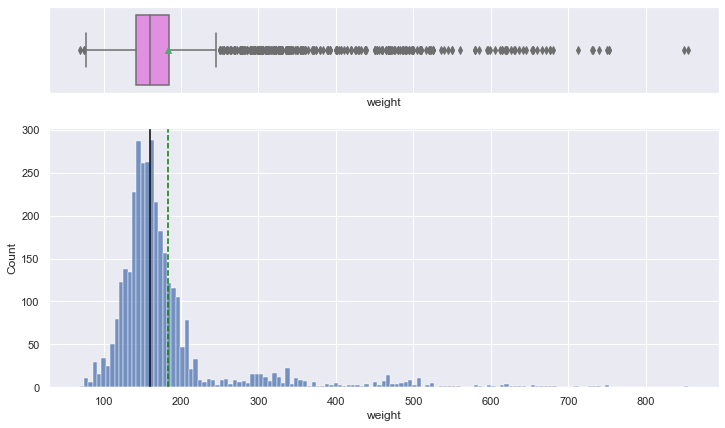

In [17]:
histogram_boxplot(data, 'weight')

* Observation: weight distribution skewed right with a lot more outliers to the right. Higher weight devices more than lower weight devices.

### battery

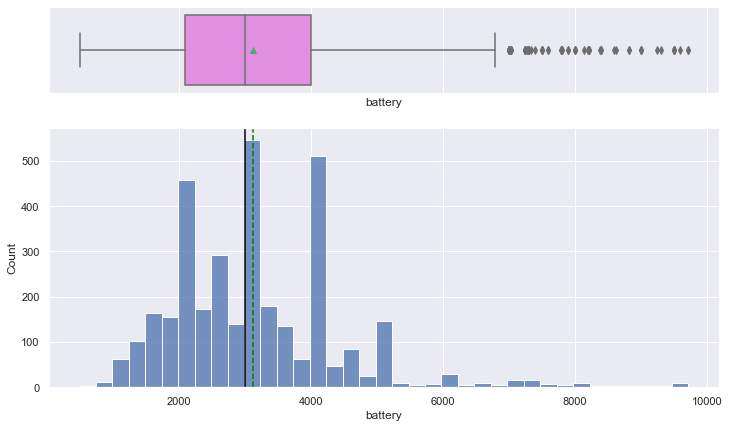

In [18]:
histogram_boxplot(data, 'battery')

* Observation: Distribution shows more higher battery capacity devices as mean is slightly higher than median with all outliers to the right. Distribution is slightly skewed right

### days_used

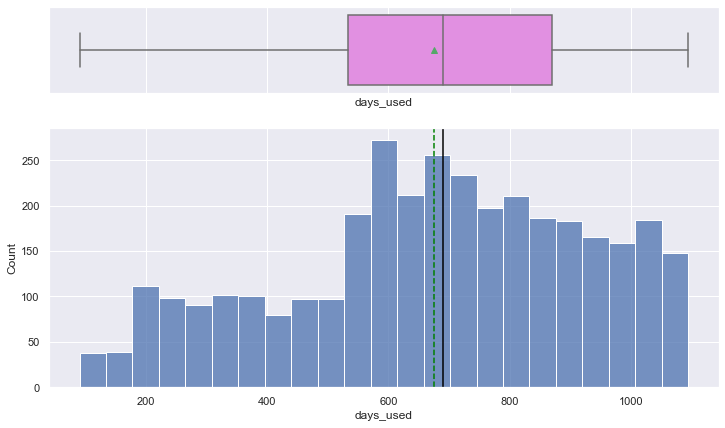

In [19]:
histogram_boxplot(data, 'days_used')

* Observation: Distribution is slightly skewed left. Mean is slightly lower than median. Most devices were used for less than ~670 days. 

### brand_name

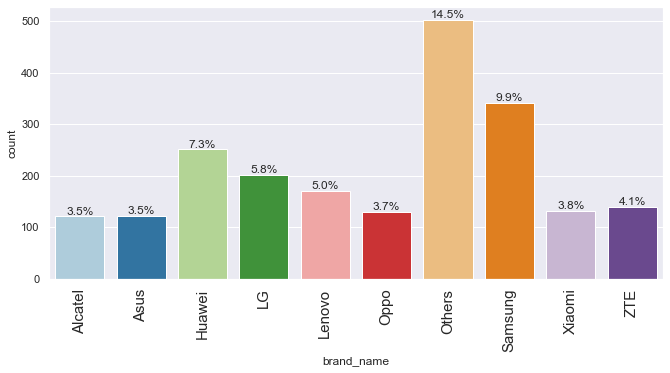

In [20]:
labeled_barplot(data, "brand_name", perc=True, n=10)

* Observation: The top 3 brands are others, Samsung, and Huawei. The least preferred brands are Alcatel, Asus, and Oppo. 

### os

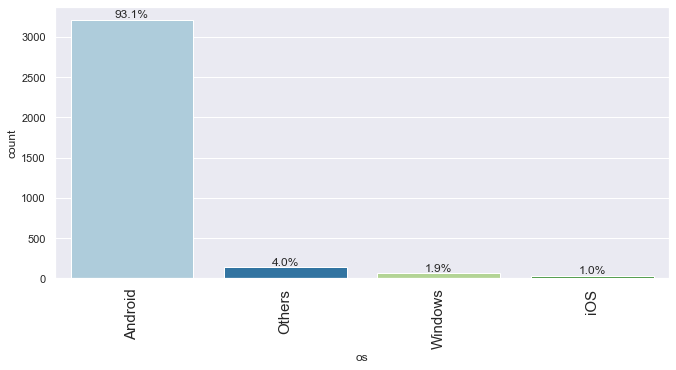

In [21]:
labeled_barplot(data, "os", perc=True, n=10)

* Observation: Android is the most preferred OS by users. Around 93% of devices run on Android OS. IOS is the least preferred OS followed by windows and others. 

### 4g

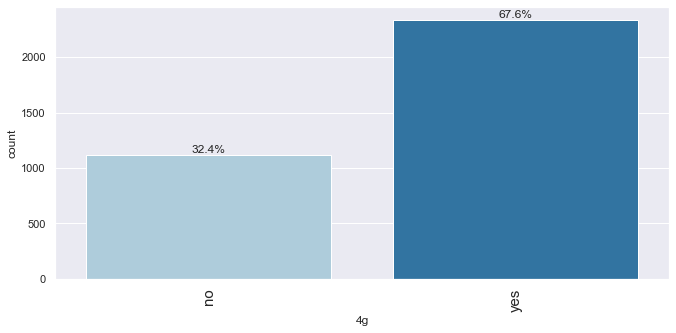

In [22]:
labeled_barplot(data, "4g", perc=True, n=10)

### 5g

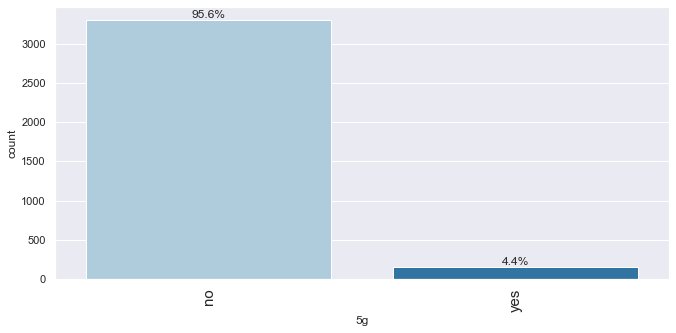

In [23]:
labeled_barplot(data, "5g", perc=True, n=10)

* Observation: For above two plots for 4G and 5G, we can see that 5G is the preferred network among users as compared to 4G. A lesser number of devices run on 4G compared to 5G.

### release year

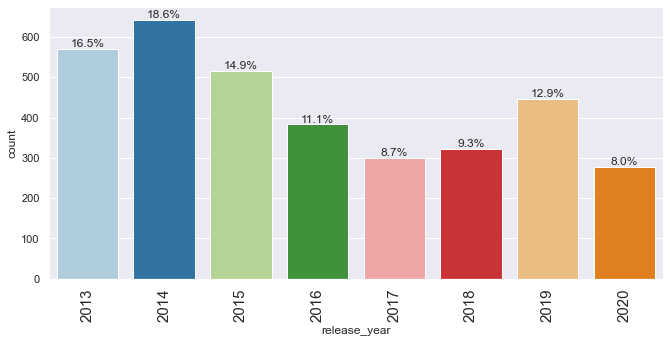

In [24]:
labeled_barplot(data, "release_year", perc=True, n=10)

Observation: 
* The top release year for devices was 2014 followed by 2013 and 2015. 
* 2020 saw the lowest devices released. 

## Bivariate Data Analysis

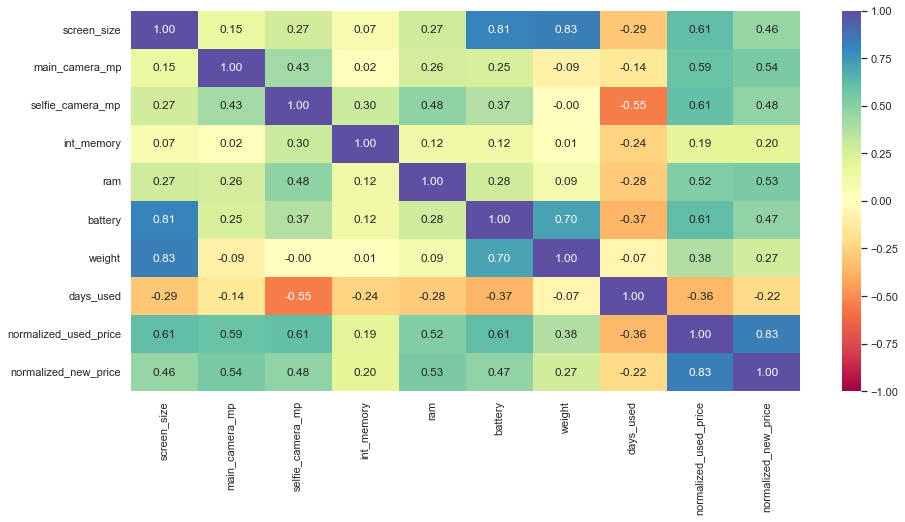

In [25]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
# Drop release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:
   * screen_size has a high positive correlation with battery and weight
   * normalized_used_price has a high positive correlation with normalized_new_price. So as normalized_new_price increases, normalized_used_price also increases.
   * days_used has a negative correlation with normalized_used_price. Hence as days_used increases, normalized_used_price decreases.
   * screen_size, main_camera_mp, selfie_camera_mp, ram and battery all have a mid positive correlation with normalized_used_price. Their correlations are neither too low nor too high.
    
    

### ram vs brand_name

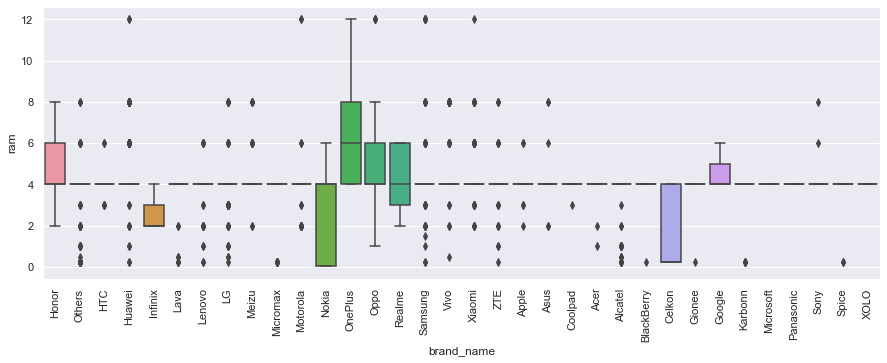

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* Observation: The minimun, 25th, 50th, 75th percentile and maximum RAM for most manufacturing brands are the same, 4GB. These is seen by the absence of a defined boxplot as seen above, meaning there is little variance from 4GB.

#### People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.

In [27]:
data_large_battery = data[data.battery > 4500]
data_large_battery.shape

(341, 15)

### brand_name vs weight for large battery devices

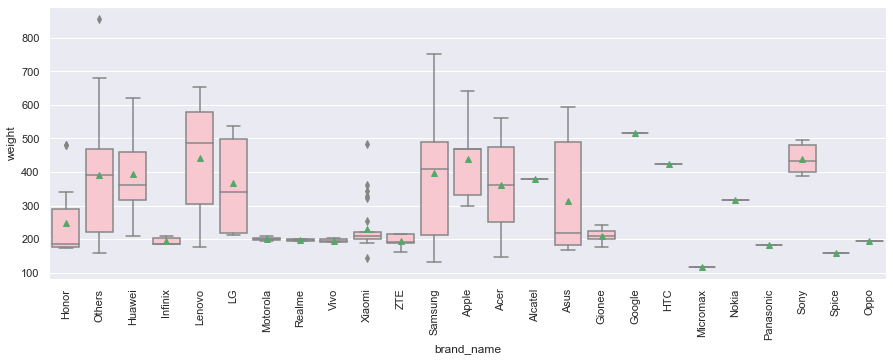

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_large_battery, x="brand_name", y="weight", showmeans=True, color='pink')
plt.xticks(rotation=90)
plt.show()

* Observation: From the box plot we see Google has highest mean large battery devices, followed by Lenovo, Apple and Sonny around the same mean value.. Micromax has the least

#### People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.



In [29]:
data_large_screen = data[data.screen_size > 6 * 2.54]
data_large_screen.shape

(1099, 15)

### brand_name distribution for large screen devices

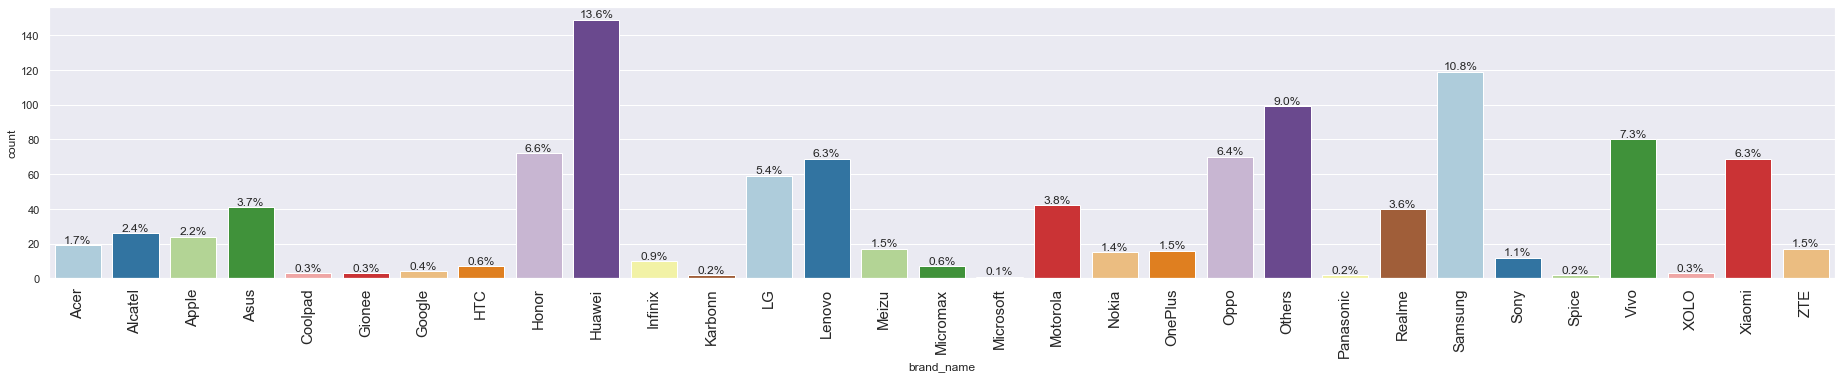

In [30]:
labeled_barplot(data_large_screen, "brand_name", perc=True)

* Observation: Huawei has the highest percentage of large screen devices (~ 14%), followed by Samsumng(~11%) then Others (9%). Microsoft has the least at 0.1%, followed by Karbon, Panasonic and Spice all at 0.2%

#### Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.

In [31]:
data_selfie_camera = data[data.selfie_camera_mp > 8]
data_selfie_camera.shape

(655, 15)

### brand_name distribution for good selfie camera devices

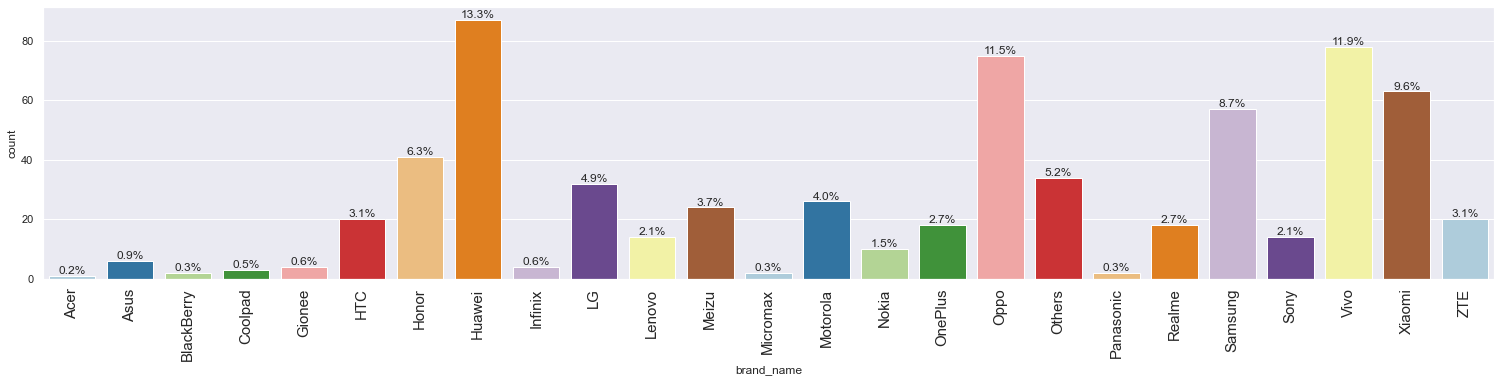

In [32]:
labeled_barplot(data_selfie_camera, "brand_name", perc=True)

* Observation: Huawei has the most devices with selfie camera mp higher than 8 MP (13%%), follwed by Vivo then Oppo. Acer has the least at 0.2%, followed by Blackberry, Micromax and Panasonic all at 0.3%

#### Doing a similar analysis for rear cameras with a higher limit of 16MP due to rear cameras having a better resolution than front cameras

In [33]:
data_main_camera = data[data.main_camera_mp > 16]
data_main_camera.shape

(94, 15)

### brand_name distribution for good rear camera devices

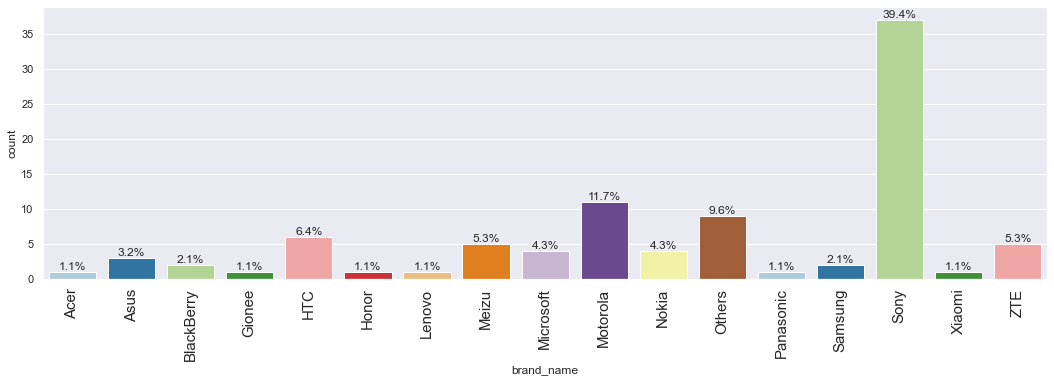

In [34]:
labeled_barplot(data_main_camera, "brand_name", perc=True)

* Observation: Sony has the most devices with rear camera mp higher than 16 MP (39%), follwed by Motorola then Others. Acer, Gionee, Honor, Lenovo, Panasonic, and Xiaomi have the least, all at 1.1% each of the total number  

### normalized_used_price vs release_year

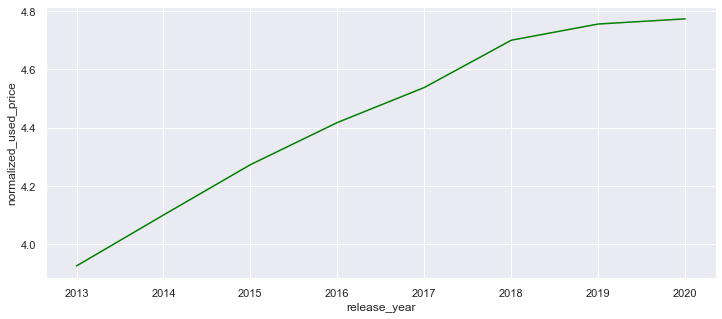

In [35]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, y='normalized_used_price', x='release_year', color='green', ci=None) 
plt.show()

* Observation: normalized_used_price shows a steady increase year after year from 2013 to 2020. Growth however slowed a little between 2018 and 2020

### Disribution of devices offering 4G and 5G networks

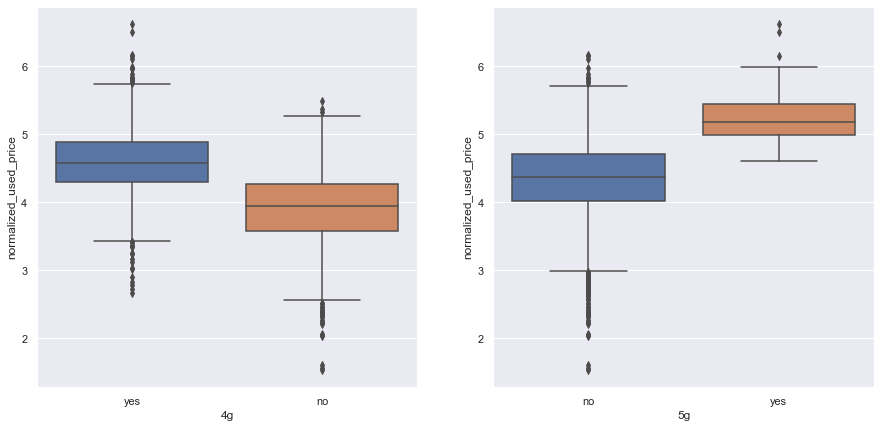

In [36]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
sns.boxplot(data=data, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=data, x="5g", y="normalized_used_price")

plt.show()

* Observation: From above plots, we can see that the average normalized_used_price of devices thatrun on 5G is higher than 4G and the price for those that do not run on 5G is also higher that those that do not run on 4G.

## Data Preprocessing

### Missing Value Imputation

data.isnull().sum()

In [37]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    data[col] = data.groupby('release_year')[col].transform(
        lambda x: x.fillna(x.median())
    ) 

In [38]:
data.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## Feature Engineering

* Create a new column years_since_release from the release_year column, with the year 2021 as the baseline
* Drop the release_year column after new column is created

In [39]:
data["years_since_release"] = 2021 - data["release_year"]
data.drop("release_year", axis=1, inplace=True)
data["years_since_release"].describe()


count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

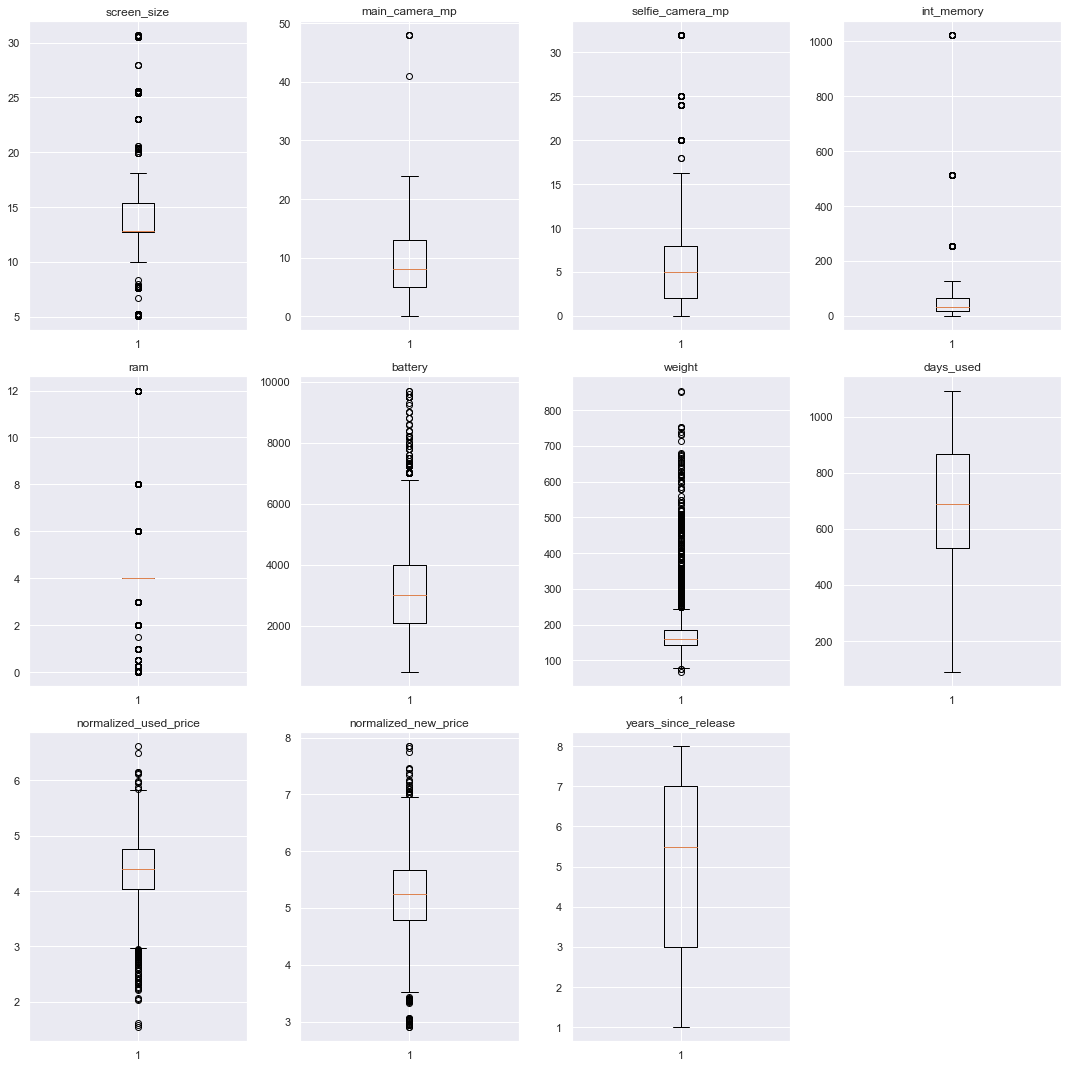

In [40]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* From the above boxplot summary, only 'days_used' and 'years_since_release' columns have no outliers. The remaining numerical columns all have outliers

### Outlier Treatment

In [41]:
def treat_outliers(data, col):
    
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [42]:
treat_out_cols = ['screen_size', 'main_camera_mp','selfie_camera_mp', 'int_memory', 
                   'battery', 'weight', 'normalized_new_price']

data1 = treat_outliers_all(data, treat_out_cols)

* Confirm treatment of outliers; Recheck boxplot

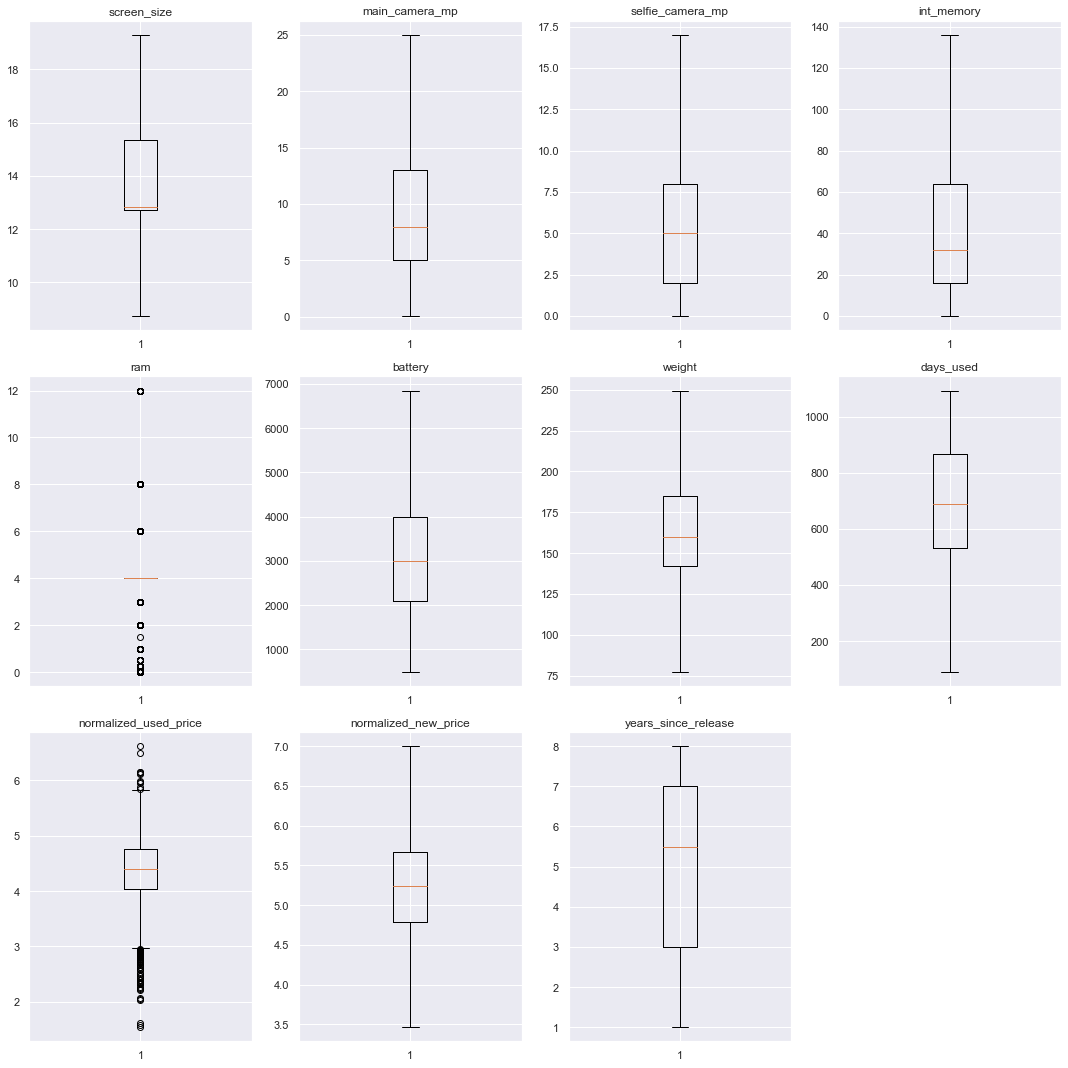

In [43]:
plt.figure(figsize=(15, 15))
for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(data1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We see from above boxplot summary, there are no more outliers displayed as they have all been treated

In [44]:
data1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.425356,4.532445,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.726459,39.070439,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.037238,1.365132,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3108.710046,1212.900792,500.0,2100.0,3000.0,4000.0,6850.0


* The screen size now ranges from 8.74 cm to 19.3 cm
* The normalized new prices ranges from ~3.5 to 7 Euros
* The longest time since release of a device is 8 years

## Data Preparation for Modeling


##### Define dependent and independent variables

In [45]:
X = data1.drop(['normalized_used_price'], axis=1)
y = data1['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        19.30  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   6850.0   249.5        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

##### Add intercept to data

##### Create dummy variables

In [46]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True,
)  

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6.0,6850.0,249.5,345,5.630961,1,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,1,0


##### Split data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [48]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [49]:
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

## Build Linear Regression Model

##### Fit OLS model

In [50]:
olsmodel1 = sm.OLS(y_train, X_train1).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     256.1
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:29:16   Log-Likelihood:                 74.803
No. Observations:                   2417   AIC:                            -51.61
Df Residuals:                       2368   BIC:                             232.1
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


##### Check model performance
##### Adjusted R-squared

In [51]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

##### MAPE

In [52]:
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [53]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, X_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234597,0.181685,0.838461,0.835117,4.369395


In [54]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, X_test1, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245324,0.189672,0.833138,0.824854,4.622762


### Test for Multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
    return vif


In [56]:
checking_vif(X_train1)

,feature,VIF
0,const,233.932479
1,screen_size,5.357287
2,main_camera_mp,2.436401
3,selfie_camera_mp,3.952425
4,int_memory,2.492965
5,ram,2.184097
6,battery,3.700738
7,weight,4.602163
8,days_used,2.669528
9,normalized_new_price,3.497459


In [57]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [58]:
col_list = ['screen_size','years_since_release','brand_name_Apple','brand_name_Huawei','brand_name_Others','brand_name_Samsung','os_iOS'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(X_train1, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.835255,0.236962
1,brand_name_Samsung,0.835254,0.236963
2,brand_name_Others,0.835251,0.236965
3,years_since_release,0.835053,0.237107
4,os_iOS,0.834897,0.237219
5,brand_name_Apple,0.834856,0.237249
6,screen_size,0.828112,0.242045


* We will drop brand_name_Huawei and check for VIF again

In [59]:
# Dropping brand_name_Huawei

col_to_drop = "brand_name_Huawei"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,174.420785
1,screen_size,5.353661
2,main_camera_mp,2.433880
3,selfie_camera_mp,3.949671
4,int_memory,2.488034
5,ram,2.184055
6,battery,3.700413
7,weight,4.601093
8,days_used,2.668640
9,normalized_new_price,3.497234


In [60]:
col_list = ['screen_size','years_since_release','brand_name_Apple','os_iOS'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(X_train1, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.835053,0.237107
1,os_iOS,0.834897,0.237219
2,brand_name_Apple,0.834856,0.237249
3,screen_size,0.828112,0.242045


In [61]:
# Dropping years_since_release

col_to_drop = "years_since_release"
X_train3 = X_train2.loc[:, ~X_train2.columns.str.startswith(col_to_drop)]
X_test3 = X_test2.loc[:, ~X_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,171.741358
1,screen_size,5.288422
2,main_camera_mp,2.418888
3,selfie_camera_mp,3.401287
4,int_memory,2.390663
5,ram,2.182379
6,battery,3.628564
7,weight,4.592649
8,days_used,1.990257
9,normalized_new_price,3.099755


In [62]:
# Dropping os_iOS

col_to_drop = "os_iOS"
X_train4 = X_train3.loc[:, ~X_train3.columns.str.startswith(col_to_drop)]
X_test4 = X_test3.loc[:, ~X_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,171.173205
1,screen_size,5.283938
2,main_camera_mp,2.412395
3,selfie_camera_mp,3.388226
4,int_memory,2.389820
5,ram,2.168365
6,battery,3.618616
7,weight,4.591251
8,days_used,1.986666
9,normalized_new_price,3.099739


In [63]:
# Dropping screen_size

col_to_drop = "screen_size"
X_train5 = X_train4.loc[:, ~X_train4.columns.str.startswith(col_to_drop)]
X_test5 = X_test4.loc[:, ~X_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,154.897927
1,main_camera_mp,2.412393
2,selfie_camera_mp,3.350517
3,int_memory,2.389172
4,ram,2.165691
5,battery,3.223945
6,weight,2.754113
7,days_used,1.950622
8,normalized_new_price,3.097041
9,brand_name_Alcatel,1.445497


##### All remaining predictor variables have little to no multicollinearity (VIF < 5). Hence the assumption is satisfied 

### Check model performance after multicollinearity check

In [64]:
olsmod2 = sm.OLS(y_train, X_train5).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.830
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     264.0
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:29:17   Log-Likelihood:                 16.069
No. Observations:                   2417   AIC:                             57.86
Df Residuals:                       2372   BIC:                             318.4
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Observations
* We can see that the adjusted R-squared is approxiamtely 0.83 for the train set (70% of the dataset), which shows that the dropped columns did not have a significant effect on the model.
    
### Dropping high p-value variables
* We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
*Instead, we will do the following:
    * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    * Create a new model without the dropped feature, check the p-values of the variables, and drop the column
    with the highest p-value.
    * Repeat the above two steps till there are no columns with p-value > 0.05.


In [65]:
# initial list of columns
cols = X_train5.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train5[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_new_price', 'brand_name_Celkon', 'brand_name_Micromax', 'brand_name_Nokia', 'brand_name_Others', 'brand_name_Sony', 'os_Others', '4g_yes']


In [66]:
X_train6 = X_train5[selected_features]
X_test6 = X_test5[selected_features]

In [67]:
olsmodel2 = sm.OLS(y_train, X_train6).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     828.5
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:29:17   Log-Likelihood:                 2.0564
No. Observations:                   2417   AIC:                             25.89
Df Residuals:                       2402   BIC:                             112.7
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

##### Observations
* No predictor variable has p-value greater than 0.05. Hence we can consider features in X_train6 as the final model
* Selected features cost, main_camera_mp, selfie_camera_mp,int_memory, ram, battery, weight, normalized_new_price, brand_name_Nokia, 4g_yes have positive influence on the target variable, while brand_name_Celkon, brand_name_Micromax, brand_name_Others, brand_name_Sony and os_Others have negative influence on the target variable normalized_used_price
* Adjusted R-squared still remains at ~0.83, implying that the latest model explains ~83% of the variance and the dropped variables were not affecting the model much so we now proceed to check the remaining assumptions on olsmodel2


## Test for Linearity and Independence 

In [68]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.824252,0.263236
1525,4.448399,4.750452,-0.302052
1128,4.315353,4.337797,-0.022445
3003,4.282068,4.259335,0.022733
2907,4.456438,4.490670,-0.034232


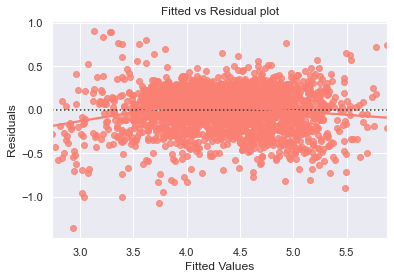

In [69]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="salmon", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* From above distribution we do not see a prefectly linear pattern, however this can be said to be negligible as the range of residuals is not huge and can be said to follow an almost linear pattern.

## Test for Normality

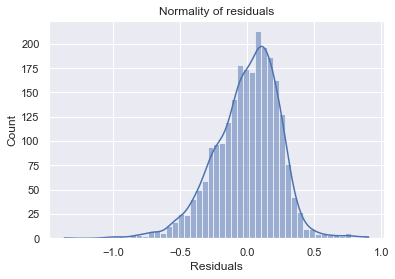

In [70]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

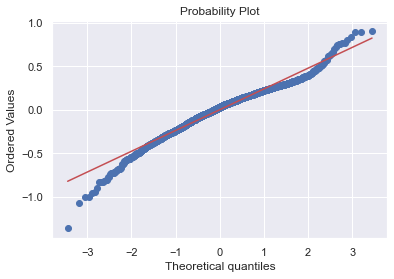

In [71]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* From the graph we see that the residuals more or less follow a straight line except for the tails
* Next, we check results of the Shapiro-Wilk test

##### Another test to check for normality is the Shapiro-Wilk test
* Null hypothesis: Residuals are normally distributed
* Alternate hypothesis: Residuals are not normally distributed

In [72]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9743503928184509, pvalue=2.0131668101135566e-20)

* According to the Shapiro-Wilk test, we reject the null hypothesis. Hence the residuals are not normally distributed. However, as an approximation, we can say the distribution is close to being normal so the assumption is satisfied

### TEST FOR HOMOSCEDASTICITY
* We will test for homoscedasticity by using the goldfeldquandt test.
* If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [73]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train6)
lzip(name, test)

[('F statistic', 1.0316263876247034), ('p-value', 0.2953836685475582)]

* Since the p-value > 0.05, we can conclude that the residuals are homoscedastic. Hence the assumption is satisfied

## Final Model Summary

### Comparison of actual and predicted output

In [74]:
pred = olsmodel2.predict(X_test6)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1995,95.239957,86.602780
2341,50.493131,63.308472
1913,46.349258,46.795466
688,79.867798,68.524937
650,92.475076,136.567314
2291,77.270339,82.922352
40,124.826465,153.278074
1884,58.201721,63.888238
2538,74.439469,63.685599
45,155.759967,156.264989


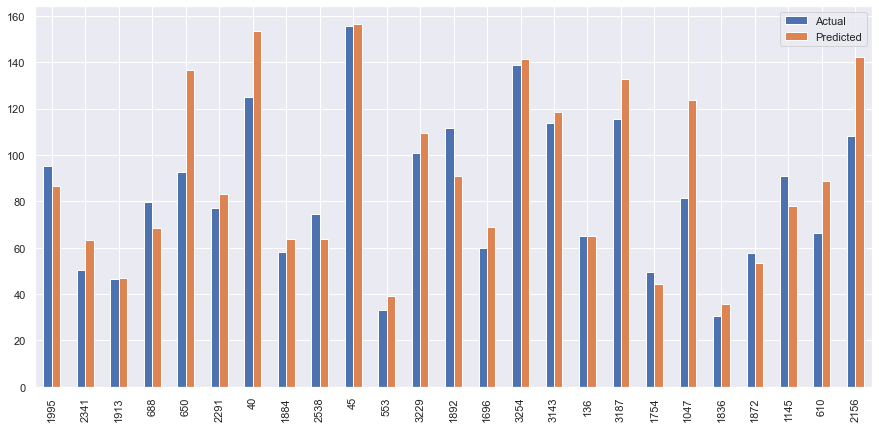

In [75]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

##### Observations:
* We can see that our model has returned good prediction results; The actual and predicted values are comparable to a high extent, however there can be more room for improvement but bearing in mind that our predicted model will most likely not be 100% equal to the actual

### Recreate final model summary

In [76]:
olsmodel_final = sm.OLS(y_train, X_train6).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     828.5
Date:                   Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                           00:29:19   Log-Likelihood:                 2.0564
No. Observations:                   2417   AIC:                             25.89
Df Residuals:                       2402   BIC:                             112.7
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, X_train6, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241765,0.187478,0.828438,0.827366,4.512934


In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, X_test6, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.250336,0.193212,0.826249,0.823697,4.717017


### Equation for Linear Regression

In [79]:
Equation = "Normalized used price ="
print(Equation, end=" ")
for i in range(len(X_train6.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train6.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train6.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train6.columns[i], ")")

Normalized used price = 1.1949091417622095 + ( 0.02247560356753258 )*( main_camera_mp ) + ( 0.0191788156400413 )*( selfie_camera_mp ) + ( 0.0006848078248926061 )*( int_memory ) + ( 0.022625802435689818 )*( ram ) + ( 3.063878069744797e-05 )*( battery ) + ( 0.00341218555084152 )*( weight ) + ( 0.3914995721231457 )*( normalized_new_price ) + ( -0.1143891382440374 )*( brand_name_Celkon ) + ( -0.06957367308137855 )*( brand_name_Micromax ) + ( 0.11543932708258356 )*( brand_name_Nokia ) + ( -0.03897111450237556 )*( brand_name_Others ) + ( -0.0757128344637103 )*( brand_name_Sony ) + ( -0.14479821305501306 )*( os_Others ) + ( 0.0355781105360925 )*( 4g_yes )


## Actionable Insights and Recommendations

* The linear predictive model is able to predict the target variable, normalized_used_price of the devices. It explains ~ 83% of the variance in the data, with a MAPE of ~ 4.7%. Hence the model is good.
* From the linear regression model summary, we can see that main_camera_mp, selfie_camera_mp, int_memory, ram, weight, battery and normalized_used_price are all significant parameters in the normalized_used_price of a device. This is seen by their positive coefficients, meaning as they increase, the target variable is expected to increase and vice versa.
* The remaining paranmaters, mostly brand names (except brand_name_Nokia) have the reverse effect on the used price. As the increase the used price decreases and vice versa.
* From the EDA, we see a high positive linear correlation between new price and used price. This reaffirms the validity of the model
* 1 unit increase in new price is expected to increase used price by  ~ 0.39 units
* All the assumptions for linear regression were satisfied for the model; multicollinearoty, homoscedasticity, linearity and normality, with linearity and normality assumed satisfied with distribution patterns observed.